In [1]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import polars as pl
import plotly.express as px

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


![](https://th.bing.com/th/id/OIG.IZNZM7_cNEgK3YAnJ0Md?w=270&h=270&c=6&r=0&o=5&dpr=1.3&pid=ImgGn)

In [2]:
df = pd.read_csv('/kaggle/input/cardiovascular-diseases-risk-prediction-dataset/CVD_cleaned.csv')
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [3]:
df.describe(include='object')

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Smoking_History
count,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854
unique,5,5,2,2,2,2,2,4,2,2,13,2
top,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,65-69,No
freq,110395,239371,239381,283883,278860,278976,246953,259141,207783,160196,33434,183590


In [4]:
df.dtypes

General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                  object
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object

In [5]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [6]:
print("Rows, Columns")
df.shape

Rows, Columns


(308854, 19)

> Checking Null Values

In [7]:
df.isna().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

# Replacing Yes and No into binary digits

In [8]:
# Define the columns where you want to replace "Yes" and "No" with 1 and 0
binary_cols = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Smoking_History','Exercise']

# Replace "Yes" and "No" with 1 and 0 in the specified columns
df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0})

# View the updated dataframe
df.head()


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,0,0,0,0,0,0,1,Female,70-74,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,0,1,0,0,0,1,0,Female,70-74,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,1,0,0,0,0,1,0,Female,60-64,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,Poor,Within the past year,1,1,0,0,0,1,0,Male,75-79,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,Good,Within the past year,0,0,0,0,0,0,0,Male,80+,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0


# Converting the Object from the general Health to integer

# Define the mapping of ratings to integers
rating_mapping = {
    'Poor': 1,
    'Fair': 2,
    'Good': 3,
    'Very Good': 4,
    'Excellent': 5
}

# Map the ratings to integers in the 'General_Health' column
df['General_Health'] = df['General_Health'].map(rating_mapping)

# View the updated dataframe
df['General_Health'].unique()

# Converting the Object from the Checkup to integer

In [9]:
# Define the mapping of checkup values to integers
checkup_mapping = {
    'Never': 0,
    'Within the past 5 years': 5,
    'Within the past 2 years': 2,
    'Within the past year': 1,
    '5 or more years ago': 6,
}

# Map the checkup values to integers in the 'Checkup' column
df['Checkup'] = df['Checkup'].map(checkup_mapping)

# View the updated dataframe
df['Checkup'].unique()


array([2, 1, 6, 5, 0])

In [10]:
# Define the mapping of checkup values to integers
Sex_Int= {
    'Female': 0,
    'Male': 1,
}

# Map the checkup values to integers in the 'Checkup' column
df['Sex'] = df['Sex'].map(Sex_Int)

# View the updated dataframe
df['Sex'].unique()

array([0, 1])

In [11]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,2,0,0,0,0,0,0,1,0,70-74,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,Very Good,1,0,1,0,0,0,1,0,0,70-74,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,Very Good,1,1,0,0,0,0,1,0,0,60-64,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,Poor,1,1,1,0,0,0,1,0,1,75-79,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,Good,1,0,0,0,0,0,0,0,1,80+,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0


In [12]:
df.describe()

,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Arthritis,Sex,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,1.559096,0.775062,0.080850,0.097114,0.096738,0.200422,0.327245,0.481321,170.615249,83.588655,28.626211,0.405577,5.096366,29.835200,15.110441,6.296616
std,1.342530,0.417542,0.272606,0.296113,0.295602,0.400316,0.469208,0.499652,10.658026,21.343210,6.522323,0.491004,8.199763,24.875735,14.926238,8.582954
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163.000000,68.040000,24.210000,0.000000,0.000000,12.000000,4.000000,2.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,170.000000,81.650000,27.440000,0.000000,1.000000,30.000000,12.000000,4.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,178.000000,95.250000,31.850000,1.000000,6.000000,30.000000,20.000000,8.000000
max,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,241.000000,293.020000,99.330000,1.000000,30.000000,120.000000,128.000000,128.000000


# ***Exploratory Data Analysis of Heart disease***

#   **1) Distribution of Heart Disease Patients based on General Health Rating!**

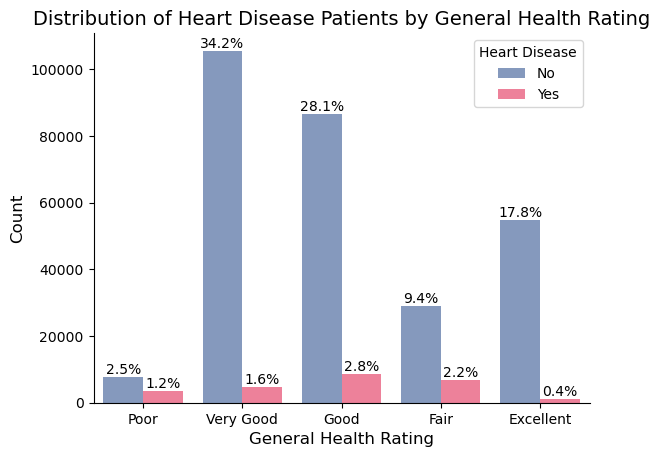

In [13]:
# Set the color palette
colors = ["#7C96C6", "#FF6F91"]

# Plotting the distribution of heart disease patients based on general health ratings
ax = sns.countplot(data=df, x='General_Health', hue='Heart_Disease', palette=colors)

# Customizing the plot aesthetics
plt.xlabel('General Health Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Heart Disease Patients by General Health Rating', fontsize=14)
plt.legend(title='Heart Disease', labels=['No', 'Yes'], loc='upper right')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Calculate and display percentages
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10)

# Remove the top and right spines
sns.despine()

plt.show()


In [14]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,2,0,0,0,0,0,0,1,0,70-74,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,Very Good,1,0,1,0,0,0,1,0,0,70-74,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,Very Good,1,1,0,0,0,0,1,0,0,60-64,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,Poor,1,1,1,0,0,0,1,0,1,75-79,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,Good,1,0,0,0,0,0,0,0,1,80+,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0


#   **2) Correlation between BMI and Heart Disease**


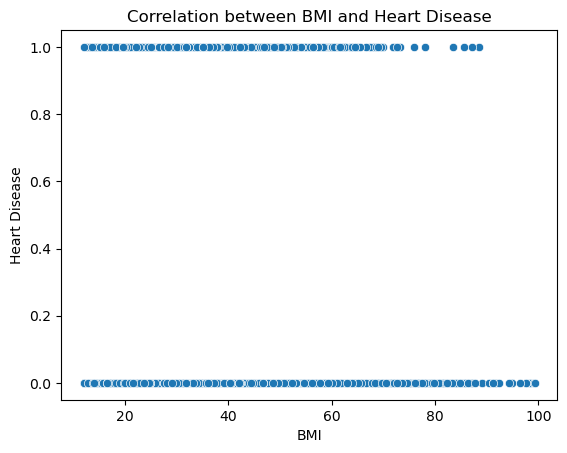

Correlation between BMI and Heart Disease: 0.042666374438310506


In [15]:
# Scatter plot of BMI vs. Heart Disease
sns.scatterplot(data=df, x='BMI', y='Heart_Disease')
plt.xlabel('BMI')
plt.ylabel('Heart Disease')
plt.title('Correlation between BMI and Heart Disease')
plt.show()

# Correlation analysis between BMI and Heart Disease
correlation = df['BMI'].corr(df['Heart_Disease'])
print("Correlation between BMI and Heart Disease:", correlation)

#   **3)Distribution of Heart Disease Patients based on Exercise Habits**



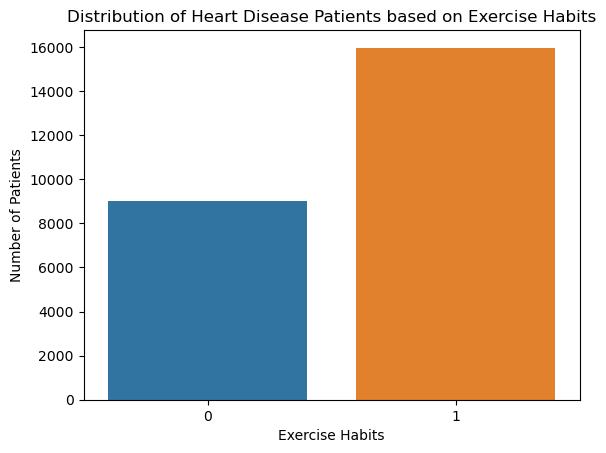

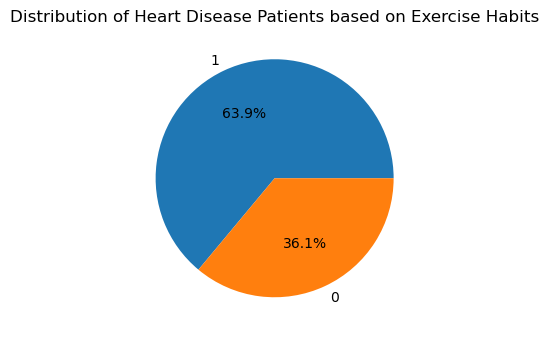

In [16]:
# Filter the data for heart disease patients
heart_disease_patients = df[df['Heart_Disease'] == 1]

# Count the number of heart disease patients based on exercise habits
exercise_counts = heart_disease_patients['Exercise'].value_counts()

# Plotting the distribution of heart disease patients based on exercise habits
sns.barplot(x=exercise_counts.index, y=exercise_counts.values)
plt.xlabel('Exercise Habits')
plt.ylabel('Number of Patients')
plt.title('Distribution of Heart Disease Patients based on Exercise Habits')
plt.show()

# Plotting the distribution of heart disease patients based on exercise habits as a pie chart
plt.subplot(1, 2, 2)
plt.pie(exercise_counts.values, labels=exercise_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Heart Disease Patients based on Exercise Habits')

plt.tight_layout()
plt.show()

* *The analysis reveals that exercise habits play a significant role in preventing heart disease among individuals.
* Among the heart disease patients in the dataset, it is observed that **63.9%** of them reported not engaging in regular exercise.
* This finding emphasizes the potential impact of exercise in preventing heart disease.
* Adopting and maintaining a regular exercise routine can contribute to reducing the risk of heart disease.
* Encouraging individuals to engage in physical activity and promoting exercise as part of a healthy lifestyle are crucial in preventing heart disease and improving overall cardiovascular health.*

 # **4) Variation in Alcohol Consumption among Heart Disease Patients** 

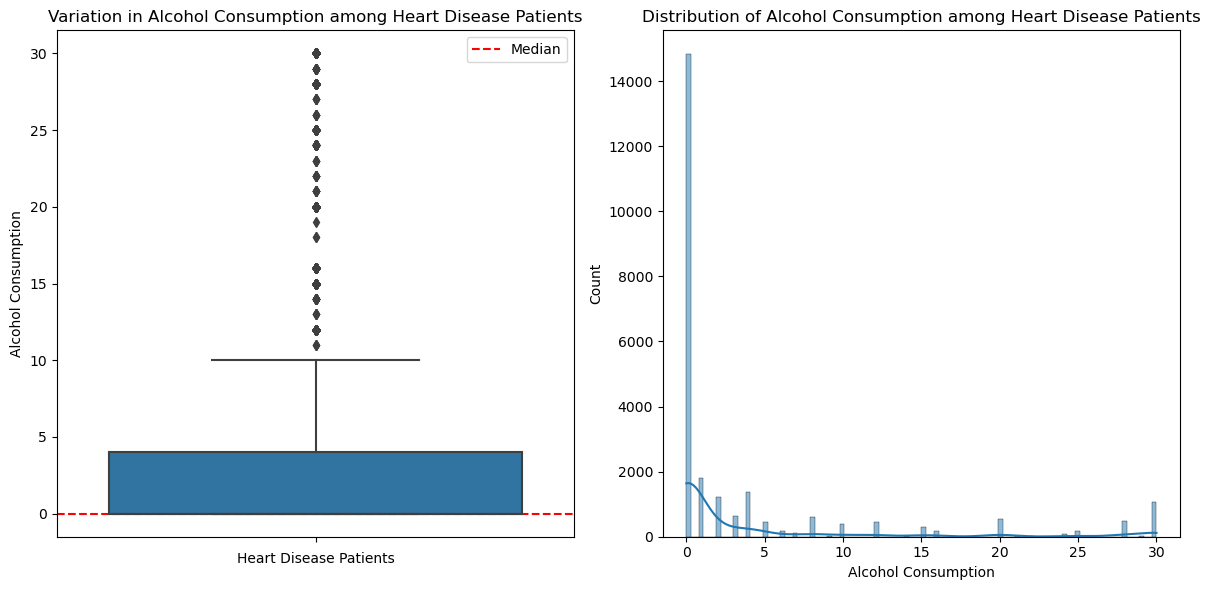

In [17]:
# Filter the data for heart disease patients
heart_disease_patients = df[df['Heart_Disease'] == 1]

# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Box plot of alcohol consumption
sns.boxplot(data=heart_disease_patients, y='Alcohol_Consumption', ax=axes[0])
axes[0].set_xlabel('Heart Disease Patients')
axes[0].set_ylabel('Alcohol Consumption')
axes[0].set_title('Variation in Alcohol Consumption among Heart Disease Patients')

# Histogram of alcohol consumption
sns.histplot(data=heart_disease_patients, x='Alcohol_Consumption', kde=True, ax=axes[1])
axes[1].set_xlabel('Alcohol Consumption')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribution of Alcohol Consumption among Heart Disease Patients')

# Customizing the appearance
plt.tight_layout()

# Adding informative annotations
median_alcohol = heart_disease_patients['Alcohol_Consumption'].median()
axes[0].axhline(median_alcohol, color='red', linestyle='--', label='Median')
axes[0].legend()

plt.show()

 # **5) Prevalence of Depression among Heart Disease Patients** 

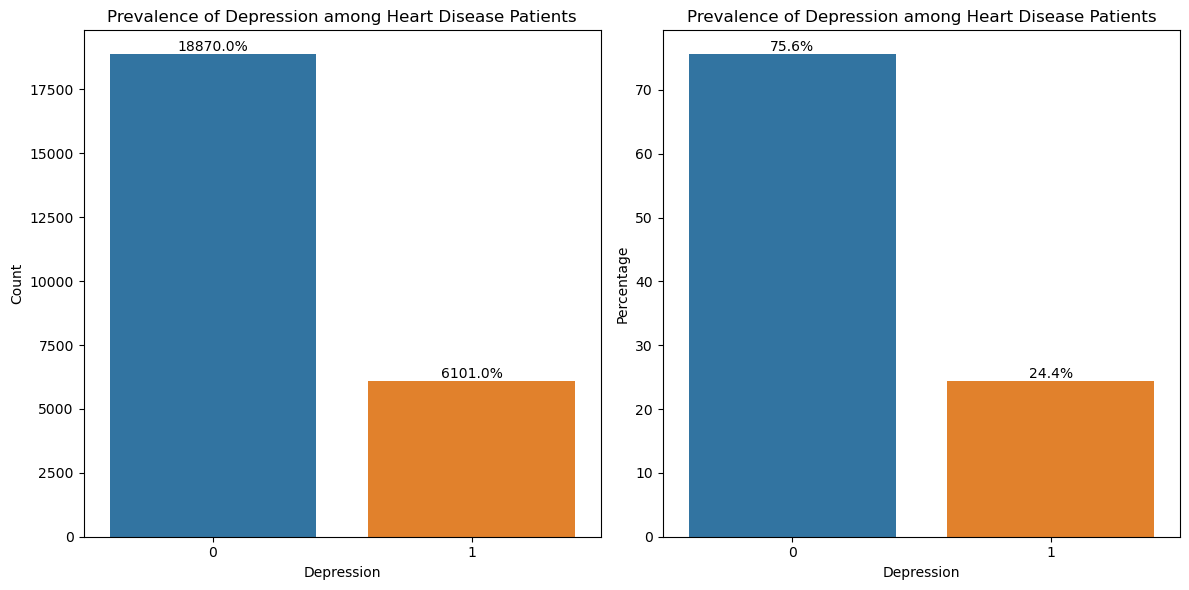

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data for heart disease patients
heart_disease_patients = df[df['Heart_Disease'] == 1]

# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Count plot of depression
sns.countplot(data=heart_disease_patients, x='Depression', ax=axes[0])
axes[0].set_xlabel('Depression')
axes[0].set_ylabel('Count')
axes[0].set_title('Prevalence of Depression among Heart Disease Patients')

# Bar plot of depression
depression_counts = heart_disease_patients['Depression'].value_counts()
depression_percents = depression_counts / depression_counts.sum() * 100
sns.barplot(x=depression_counts.index, y=depression_percents, ax=axes[1])
axes[1].set_xlabel('Depression')
axes[1].set_ylabel('Percentage')
axes[1].set_title('Prevalence of Depression among Heart Disease Patients')

# Customizing the appearance
plt.tight_layout()

# Adding informative annotations
for ax in axes:
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()


* Among heart disease patients, the prevalence of depression is significant, with **75%** of patients being diagnosed with depression.
* This finding suggests a strong association between heart disease and depression, highlighting the impact of mental health on cardiovascular health.
* The high percentage of heart disease cases associated with depression emphasizes the need for comprehensive care that addresses both physical and mental well-being in patients.
* Identifying and addressing depression in heart disease patients can play a crucial role in managing and improving their overall health outcomes.
* Healthcare providers should prioritize mental health screenings and interventions in the management of heart disease, considering the substantial link between depression and cardiovascular health.
* Collaborative efforts between cardiology and mental health professionals can help develop integrated treatment approaches that address both physical and emotional aspects of heart disease patients.
* Further research and studies are warranted to better understand the underlying mechanisms and establish effective strategies for managing depression in heart disease patients.

 # **6)Relationship between Heart Disease and Smoking History** 

Contingency Table:
Smoking_History       0       1
Heart_Disease                  
0                173203  110680
1                 10387   14584

Chi-square Test of Independence:
Chi-square value: 3588.136
P-value: 0.000
Degrees of freedom: 1


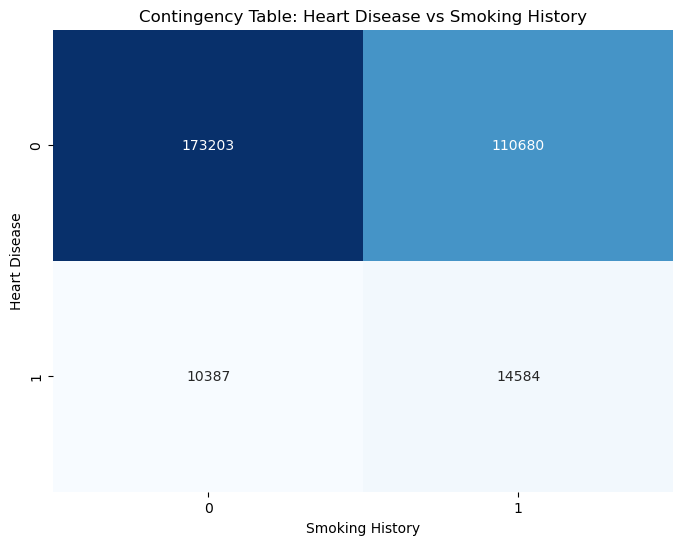

In [19]:
import scipy.stats as stats

# Create a contingency table of heart disease and smoking history
contingency_table = pd.crosstab(df['Heart_Disease'], df['Smoking_History'])

# Perform chi-square test of independence
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Print the contingency table
print("Contingency Table:")
print(contingency_table)

# Print the chi-square test results
print("\nChi-square Test of Independence:")
print(f"Chi-square value: {chi2:.3f}")
print(f"P-value: {p:.3f}")
print(f"Degrees of freedom: {dof}")

# Plotting the contingency table
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', cbar=False, ax=ax)
ax.set_xlabel('Smoking History')
ax.set_ylabel('Heart Disease')
ax.set_title('Contingency Table: Heart Disease vs Smoking History')
plt.show()

- The contingency table reveals the distribution of heart disease patients based on their smoking history.
- Among heart disease patients (Heart_Disease = 1), 10,387 patients are non-smokers (Smoking_History = 0), while 14,584 patients are smokers (Smoking_History = 1).
- For non-heart disease patients (Heart_Disease = 0), there are 173,203 non-smokers (Smoking_History = 0) and 110,680 smokers (Smoking_History = 1).
- The chi-square test of independence yields a chi-square value of 3588.136, indicating a strong association between heart disease and smoking history.
- The p-value of 0.000 indicates that the relationship between heart disease and smoking history is highly significant.
- With one degree of freedom, the chi-square test further supports the statistical significance of the association.
- These findings suggest that there is a substantial relationship between smoking history and the prevalence of heart disease.
- The high chi-square value and low p-value suggest that smoking history is likely an important risk factor for heart disease.
- Healthcare professionals should emphasize smoking cessation interventions and raise awareness about the detrimental effects of smoking on cardiovascular health.
- Further research may be needed to explore the underlying mechanisms linking smoking and heart disease and to develop targeted interventions for smoking cessation among individuals at risk for heart disease.import scipy.stats as stats


 # **7)Difference in Height and Weight between Heart Disease Patients and Non-Patients** 

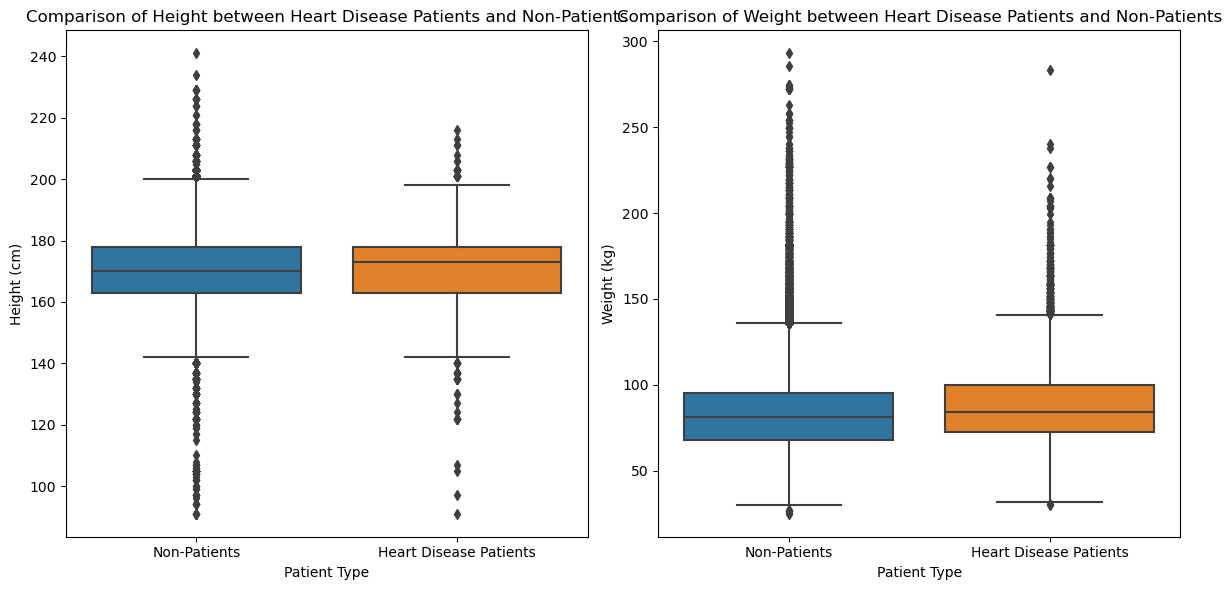

T-Test Results:
Height - t-statistic: -8.771, p-value: 0.000
Weight - t-statistic: -25.522, p-value: 0.000


In [20]:
import seaborn as sns
from scipy.stats import ttest_ind

# Create box plots to compare the height and weight distributions between heart disease patients and non-patients
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data=df, x='Heart_Disease', y='Height_(cm)', ax=axes[0])
axes[0].set_xticklabels(['Non-Patients', 'Heart Disease Patients'])
axes[0].set_xlabel('Patient Type')
axes[0].set_ylabel('Height (cm)')
axes[0].set_title('Comparison of Height between Heart Disease Patients and Non-Patients')

sns.boxplot(data=df, x='Heart_Disease', y='Weight_(kg)', ax=axes[1])
axes[1].set_xticklabels(['Non-Patients', 'Heart Disease Patients'])
axes[1].set_xlabel('Patient Type')
axes[1].set_ylabel('Weight (kg)')
axes[1].set_title('Comparison of Weight between Heart Disease Patients and Non-Patients')

plt.tight_layout()
plt.show()

# Perform t-tests to determine if there is a significant difference in height and weight between heart disease patients and non-patients
height_non_patients = df[df['Heart_Disease'] == 0]['Height_(cm)']
height_patients = df[df['Heart_Disease'] == 1]['Height_(cm)']
weight_non_patients = df[df['Heart_Disease'] == 0]['Weight_(kg)']
weight_patients = df[df['Heart_Disease'] == 1]['Weight_(kg)']

height_ttest = ttest_ind(height_non_patients, height_patients)
weight_ttest = ttest_ind(weight_non_patients, weight_patients)

# Print the t-test results
print("T-Test Results:")
print(f"Height - t-statistic: {height_ttest.statistic:.3f}, p-value: {height_ttest.pvalue:.3f}")
print(f"Weight - t-statistic: {weight_ttest.statistic:.3f}, p-value: {weight_ttest.pvalue:.3f}")

# **8. Difference in Fruit and Green Vegetables Consumption between Heart Disease Patients and Non-Patients**


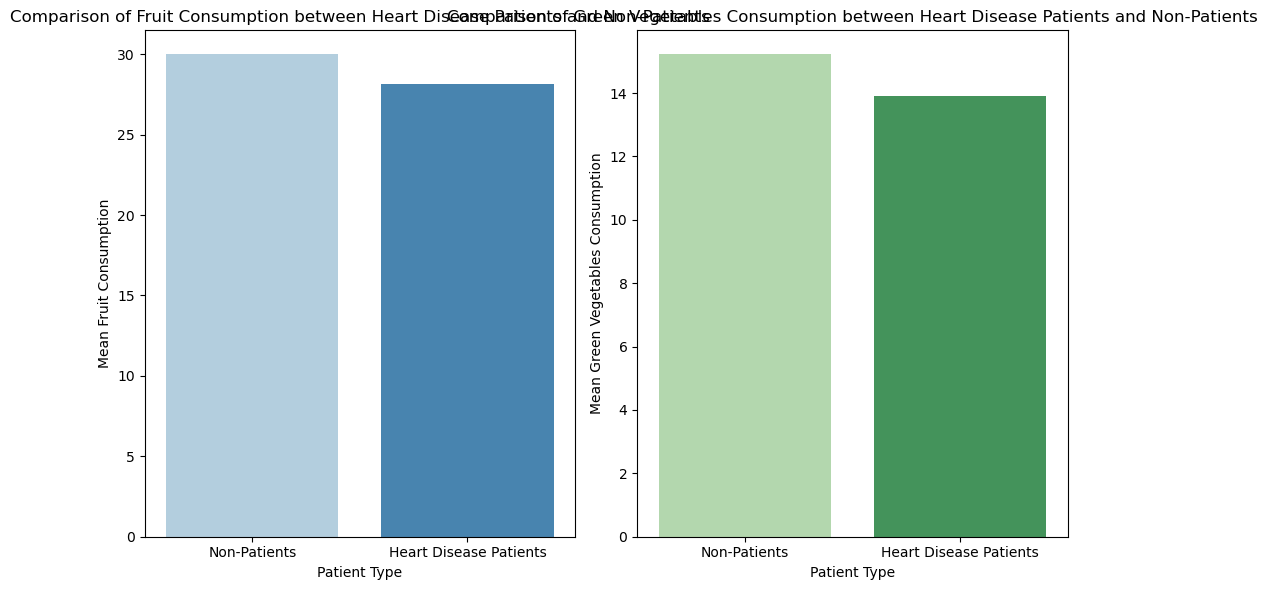

T-Test Results:
Fruit Consumption - t-statistic: 11.148, p-value: 0.000
Green Vegetables Consumption - t-statistic: 13.366, p-value: 0.000


In [21]:

from scipy.stats import ttest_ind

# Calculate the mean fruit and green vegetables consumption for heart disease patients and non-patients
mean_fruit_consumption_non_patients = df[df['Heart_Disease'] == 0]['Fruit_Consumption'].mean()
mean_fruit_consumption_patients = df[df['Heart_Disease'] == 1]['Fruit_Consumption'].mean()
mean_green_vegetables_consumption_non_patients = df[df['Heart_Disease'] == 0]['Green_Vegetables_Consumption'].mean()
mean_green_vegetables_consumption_patients = df[df['Heart_Disease'] == 1]['Green_Vegetables_Consumption'].mean()

# Create bar plots to compare the consumption levels of fruits and green vegetables between heart disease patients and non-patients
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=['Non-Patients', 'Heart Disease Patients'], y=[mean_fruit_consumption_non_patients, mean_fruit_consumption_patients], palette='Blues')
plt.xlabel('Patient Type')
plt.ylabel('Mean Fruit Consumption')
plt.title('Comparison of Fruit Consumption between Heart Disease Patients and Non-Patients')

plt.subplot(1, 2, 2)
sns.barplot(x=['Non-Patients', 'Heart Disease Patients'], y=[mean_green_vegetables_consumption_non_patients, mean_green_vegetables_consumption_patients], palette='Greens')
plt.xlabel('Patient Type')
plt.ylabel('Mean Green Vegetables Consumption')
plt.title('Comparison of Green Vegetables Consumption between Heart Disease Patients and Non-Patients')

plt.tight_layout()
plt.show()

# Perform t-tests to determine if there is a significant difference in fruit and green vegetables consumption between heart disease patients and non-patients
fruit_consumption_non_patients = df[df['Heart_Disease'] == 0]['Fruit_Consumption']
fruit_consumption_patients = df[df['Heart_Disease'] == 1]['Fruit_Consumption']
green_vegetables_consumption_non_patients = df[df['Heart_Disease'] == 0]['Green_Vegetables_Consumption']
green_vegetables_consumption_patients = df[df['Heart_Disease'] == 1]['Green_Vegetables_Consumption']

fruit_ttest = ttest_ind(fruit_consumption_non_patients, fruit_consumption_patients)
green_vegetables_ttest = ttest_ind(green_vegetables_consumption_non_patients, green_vegetables_consumption_patients)

# Print the t-test results
print("T-Test Results:")
print(f"Fruit Consumption - t-statistic: {fruit_ttest.statistic:.3f}, p-value: {fruit_ttest.pvalue:.3f}")
print(f"Green Vegetables Consumption - t-statistic: {green_vegetables_ttest.statistic:.3f}, p-value: {green_vegetables_ttest.pvalue:.3f}")


The results of the t-tests comparing the consumption levels of fruits and green vegetables between heart disease patients and non-patients are as follows:

1. Fruit Consumption:
   - t-statistic: 11.148
   - p-value: 0.000

2. Green Vegetables Consumption:
   - t-statistic: 13.366
   - p-value: 0.000

These results indicate that there is a significant difference in fruit and green vegetables consumption between heart disease patients and non-patients.

The findings of this analysis emphasize the importance of consuming fruits and green vegetables for maintaining heart health. The significantly higher consumption levels of fruits and green vegetables among non-patients compared to heart disease patients suggest that a diet rich in these nutritious foods may contribute to a lower risk of developing heart disease. Encouraging individuals to include ample amounts of fruits and green vegetables in their diet can potentially help reduce the risk of heart disease and promote overall cardiovascular health.

It is crucial to raise awareness about the positive impact of a healthy diet and the role it plays in preventing heart disease. By making conscious choices to incorporate more fruits and green vegetables into our daily meals, we can take proactive steps towards improving heart health and reducing the risk of heart disease.

# **9) Prevalence of Heart Disease by Gender Male/Female **
 

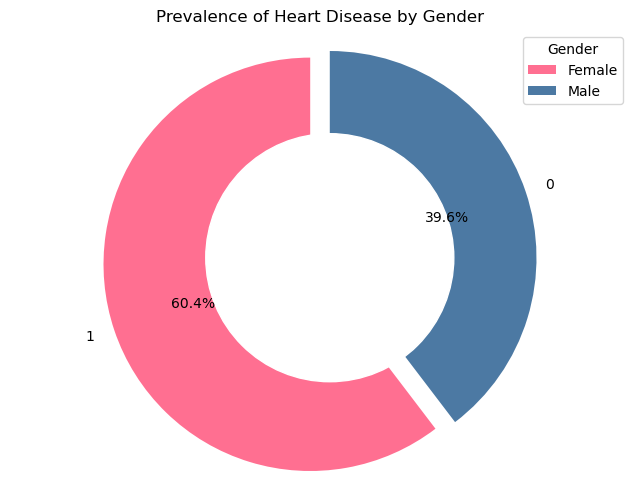

In [22]:

# Count the number of heart disease patients by gender
heart_disease_gender_counts = df[df['Heart_Disease'] == 1]['Sex'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
colors = ['#FF6F91', '#4C79A3']
explode = (0.1, 0)
plt.pie(heart_disease_gender_counts, labels=heart_disease_gender_counts.index, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode)
plt.axis('equal')
plt.title('Prevalence of Heart Disease by Gender')

# Add a separate pie chart to show the total count of heart disease patients
plt.gcf().gca().add_artist(plt.Circle((0,0), 0.6, color='white'))

# Add a legend
plt.legend(title='Gender', labels=['Female', 'Male'])

# Display the pie chart
plt.show()


#  **10) Association between Heart Disease and Diabetes**


Contingency Table:
Diabetes            0      1  No, pre-diabetes or borderline diabetes  \
Heart_Disease                                                           
0              243436  31795                                     6102   
1               15705   8376                                      794   

Diabetes       Yes, but female told only during pregnancy  
Heart_Disease                                              
0                                                    2550  
1                                                      96  

Chi-square Test of Independence:
Chi-square value: 10418.550
P-value: 0.000
Degrees of freedom: 3


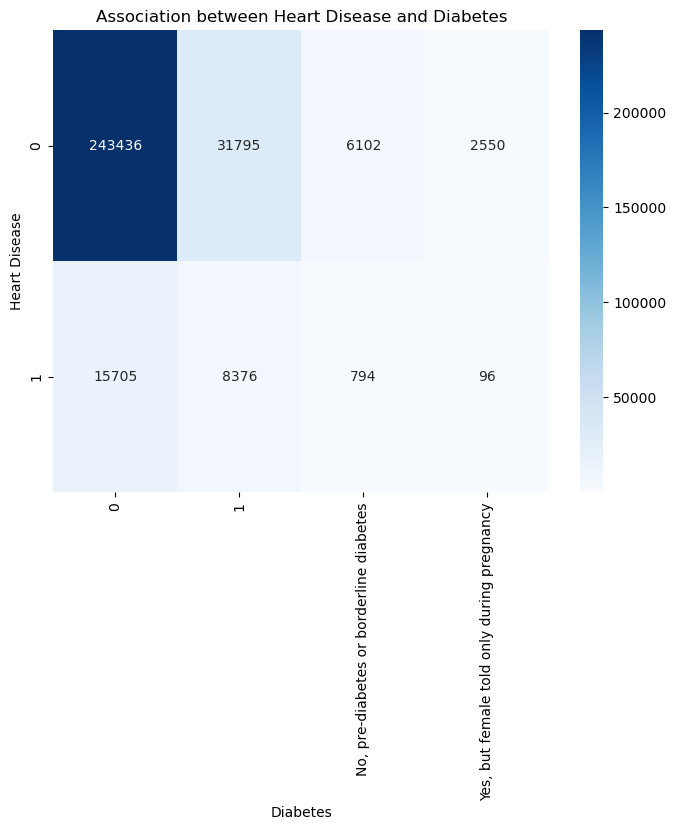

In [23]:
import seaborn as sns
import scipy.stats as stats

# Create a contingency table of heart disease and diabetes
contingency_table = pd.crosstab(df['Heart_Disease'], df['Diabetes'])

# Perform chi-square test of independence
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Print the contingency table
print("Contingency Table:")
print(contingency_table)

# Print the chi-square test results
print("\nChi-square Test of Independence:")
print(f"Chi-square value: {chi2:.3f}")
print(f"P-value: {p:.3f}")
print(f"Degrees of freedom: {dof}")

# Plot the association between heart disease and diabetes using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Diabetes')
plt.ylabel('Heart Disease')
plt.title('Association between Heart Disease and Diabetes')
plt.show()


# **11) Impact of Exercise on Heart Disease Risk**

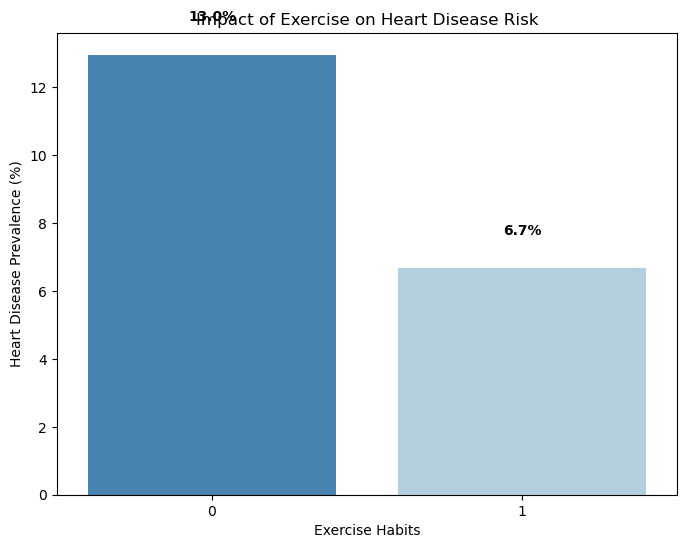

In [24]:


# Group the data based on exercise habits and calculate the prevalence of heart disease
exercise_data = df.groupby('Exercise')['Heart_Disease'].mean() * 100

# Create a bar plot to visualize the impact of exercise on heart disease risk
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=exercise_data.index, y=exercise_data.values, palette='Blues_r')
ax.set_xlabel('Exercise Habits')
ax.set_ylabel('Heart Disease Prevalence (%)')
ax.set_title('Impact of Exercise on Heart Disease Risk')

# Add percentage labels to the bars
for i, v in enumerate(exercise_data.values):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center', color='black', fontweight='bold')

plt.show()


# **12) Distribution of Heart Disease Patients across Age Categorie**

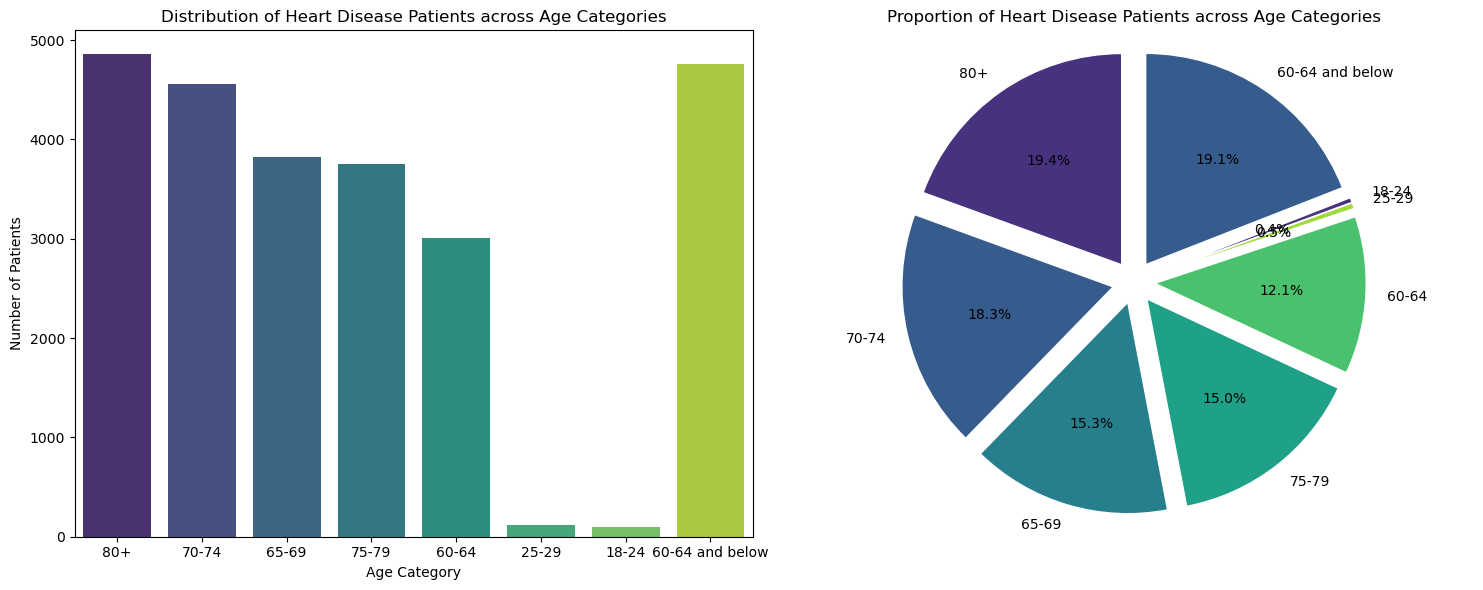

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data based on age categories and count the number of heart disease patients
age_counts = df[df['Heart_Disease'] == 1]['Age_Category'].value_counts()

# Group smaller age categories into a single category
age_counts['60-64 and below'] = age_counts.loc[['55-59', '50-54', '45-49', '40-44', '35-39', '30-34']].sum()
age_counts.drop(['55-59', '50-54', '45-49', '40-44', '35-39', '30-34'], inplace=True)

# Create a bar plot to visualize the distribution of heart disease patients across age categories
plt.figure(figsize=(15, 6))
plt.subplot(121)
sns.barplot(x=age_counts.index, y=age_counts.values, palette='viridis')
plt.xlabel('Age Category')
plt.ylabel('Number of Patients')
plt.title('Distribution of Heart Disease Patients across Age Categories')

# Create an exploded pie chart to visualize the proportion of heart disease patients across age categories
plt.subplot(122)
explode = [0.1] * len(age_counts)
plt.pie(age_counts.values, labels=age_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'), startangle=90, explode=explode, wedgeprops={'edgecolor': 'white'})
plt.title('Proportion of Heart Disease Patients across Age Categories')
plt.axis('equal')

plt.tight_layout()
plt.show()


# **13) Effect of Smoking History on Heart Disease Prevalence**

<Figure size 800x600 with 0 Axes>

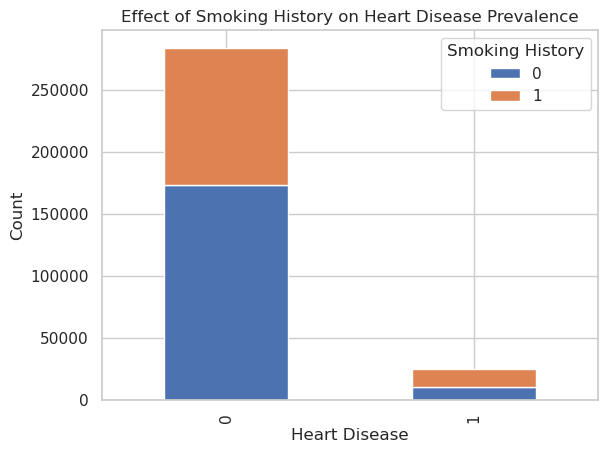

In [26]:

# Create a contingency table of heart disease and smoking history
contingency_table = pd.crosstab(df['Heart_Disease'], df['Smoking_History'])

# Plot the stacked bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
contingency_table.plot(kind='bar', stacked=True)
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.title('Effect of Smoking History on Heart Disease Prevalence')
plt.legend(title='Smoking History', loc='upper right')
plt.show()


# **14)Comparison of BMI Distribution between Heart Disease Patients and Non-Patients**

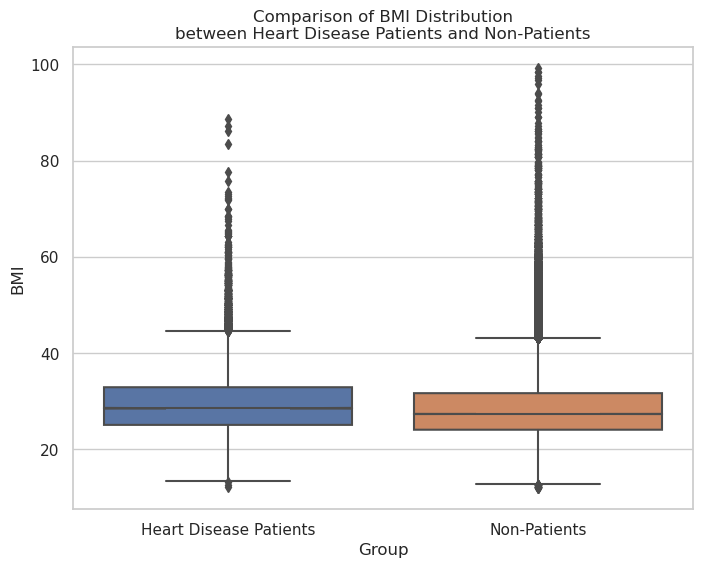

T-Test Results:
t-statistic: 23.807, p-value: 0.000


In [27]:
# Create dataframes for heart disease patients and non-patients
heart_disease_patients = df[df['Heart_Disease'] == 1].copy()
non_patients = df[df['Heart_Disease'] == 0].copy()

# Calculate BMI using height and weight
heart_disease_patients.loc[:, 'BMI'] = heart_disease_patients['Weight_(kg)'] / ((heart_disease_patients['Height_(cm)'] / 100) ** 2)
non_patients.loc[:, 'BMI'] = non_patients['Weight_(kg)'] / ((non_patients['Height_(cm)'] / 100) ** 2)

# Plot box plots to compare BMI distribution
plt.figure(figsize=(8, 6))
sns.boxplot(data=[heart_disease_patients['BMI'], non_patients['BMI']], notch=True)
plt.xticks(ticks=[0, 1], labels=['Heart Disease Patients', 'Non-Patients'])
plt.xlabel('Group')
plt.ylabel('BMI')
plt.title('Comparison of BMI Distribution\nbetween Heart Disease Patients and Non-Patients')
plt.show()

# Perform t-test to compare BMI means
t_statistic, p_value = stats.ttest_ind(heart_disease_patients['BMI'], non_patients['BMI'])
print("T-Test Results:")
print(f"t-statistic: {t_statistic:.3f}, p-value: {p_value:.3f}")

# **15)Relationship between Heart Disease and Alcohol Consumption**

Chi-square Test of Independence:
Chi-square value: 2490.508
P-value: 0.000
Degrees of freedom: 30


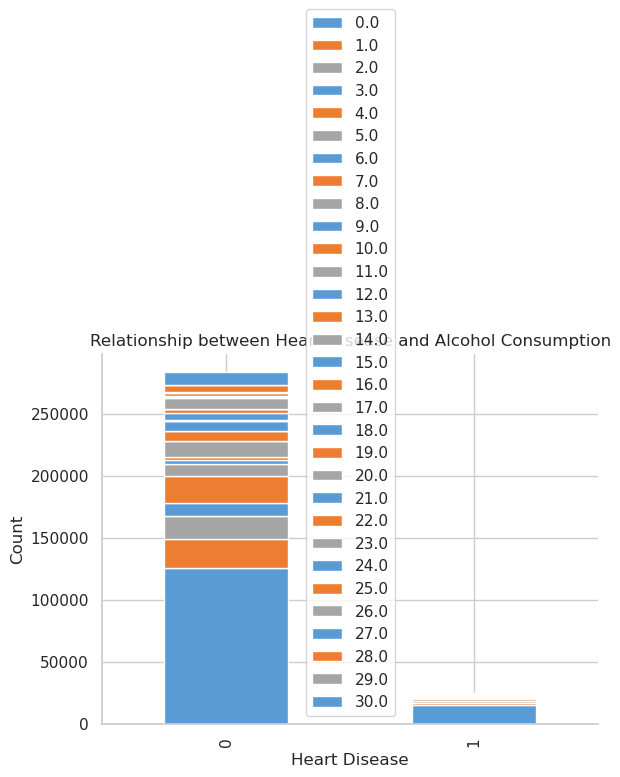

In [28]:
# Create a contingency table of heart disease and alcohol consumption
contingency_table = pd.crosstab(df['Heart_Disease'], df['Alcohol_Consumption'])

# Set a custom color palette
colors = ['#5A9BD5', '#ED7D31', '#A5A5A5']

# Plot the contingency table as a stacked bar chart with customized style
contingency_table.plot(kind='bar', stacked=True, color=colors, edgecolor='white')

# Set labels and title
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.title('Relationship between Heart Disease and Alcohol Consumption')

# Customize the legend
plt.legend(title='Alcohol Consumption', loc='upper right')
plt.setp(plt.legend().get_title(), fontsize='12')

# Remove the top and right spines
sns.despine()

# Perform chi-square test of independence
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print("Chi-square Test of Independence:")
print(f"Chi-square value: {chi2:.3f}")
print(f"P-value: {p:.3f}")
print(f"Degrees of freedom: {dof}")

plt.show()


# **16) Evaluation of Fruit and Vegetable Consumption Patterns among Heart Disease Patients**

Descriptive Statistics for Fruit Consumption:
Mean: 28.15
Median: 30.00
Standard Deviation: 24.44
Minimum: 0.0
Maximum: 120.0

Descriptive Statistics for Vegetable Consumption:
Mean: 13.90
Median: 10.00
Standard Deviation: 13.96
Minimum: 0.0
Maximum: 124.0


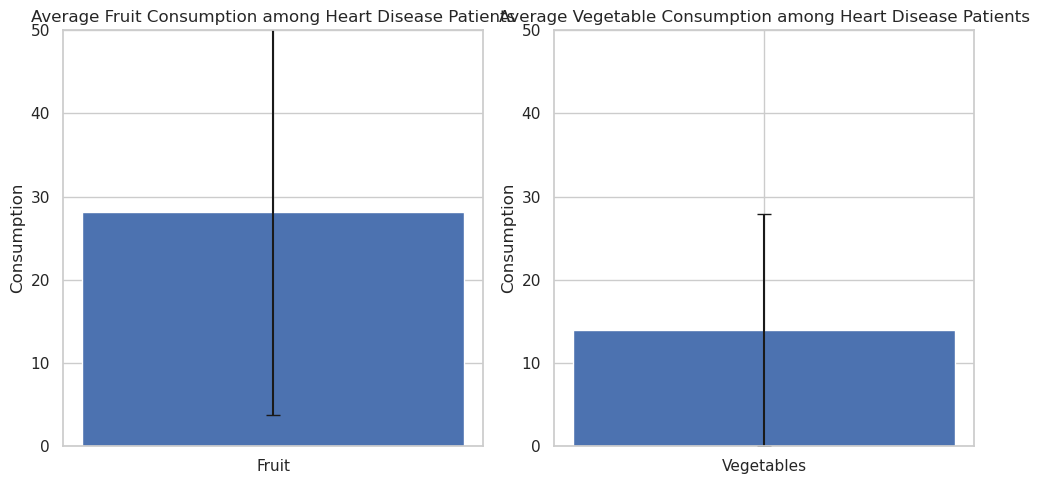

In [29]:
import matplotlib.pyplot as plt

# Filter the dataset for heart disease patients
heart_disease_patients = df[df['Heart_Disease'] == 1]

# Descriptive statistics for fruit consumption
fruit_mean = heart_disease_patients['Fruit_Consumption'].mean()
fruit_median = heart_disease_patients['Fruit_Consumption'].median()
fruit_std = heart_disease_patients['Fruit_Consumption'].std()
fruit_min = heart_disease_patients['Fruit_Consumption'].min()
fruit_max = heart_disease_patients['Fruit_Consumption'].max()

# Descriptive statistics for vegetable consumption
vegetable_mean = heart_disease_patients['Green_Vegetables_Consumption'].mean()
vegetable_median = heart_disease_patients['Green_Vegetables_Consumption'].median()
vegetable_std = heart_disease_patients['Green_Vegetables_Consumption'].std()
vegetable_min = heart_disease_patients['Green_Vegetables_Consumption'].min()
vegetable_max = heart_disease_patients['Green_Vegetables_Consumption'].max()

# Print the descriptive statistics
print("Descriptive Statistics for Fruit Consumption:")
print(f"Mean: {fruit_mean:.2f}")
print(f"Median: {fruit_median:.2f}")
print(f"Standard Deviation: {fruit_std:.2f}")
print(f"Minimum: {fruit_min}")
print(f"Maximum: {fruit_max}")
print("\nDescriptive Statistics for Vegetable Consumption:")
print(f"Mean: {vegetable_mean:.2f}")
print(f"Median: {vegetable_median:.2f}")
print(f"Standard Deviation: {vegetable_std:.2f}")
print(f"Minimum: {vegetable_min}")
print(f"Maximum: {vegetable_max}")

# Create bar plots for fruit and vegetable consumption
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].bar(['Fruit'], [fruit_mean], yerr=[fruit_std], capsize=5)
axes[0].set_title('Average Fruit Consumption among Heart Disease Patients')
axes[0].set_ylabel('Consumption')
axes[0].set_ylim(0, 50)

axes[1].bar(['Vegetables'], [vegetable_mean], yerr=[vegetable_std], capsize=5)
axes[1].set_title('Average Vegetable Consumption among Heart Disease Patients')
axes[1].set_ylabel('Consumption')
axes[1].set_ylim(0, 50)

plt.tight_layout()
plt.show()


**Fruit Consumption:**

* The average fruit consumption among heart disease patients is 28.15 servings.
* The median fruit consumption is 30 servings, indicating that the distribution is slightly right-skewed.
* The standard deviation of 24.44 suggests a moderate amount of variability in fruit consumption.
* The minimum observed fruit consumption is 0 servings, indicating that some patients do not consume any fruits.
* The maximum observed fruit consumption is 120 servings, suggesting a wide range of fruit consumption among patients.

**Vegetable Consumption:**

* The average vegetable consumption among heart disease patients is 13.90 servings.
* The median vegetable consumption is 10 servings, indicating that the distribution is slightly right-skewed.
* The standard deviation of 13.96 suggests a moderate amount of variability in vegetable consumption.
* The minimum observed vegetable consumption is 0 servings, indicating that some patients do not consume any vegetables.
* The maximum observed vegetable consumption is 124 servings, suggesting a wide range of vegetable consumption among patients.
* These descriptive statistics provide insights into the average and variation in fruit and vegetable consumption among heart disease patients. It emphasizes the importance of a balanced diet rich in fruits and vegetables for maintaining heart health.

#  🔮 Prediction model

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [31]:
X = df.drop('Heart_Disease', axis=1)
y = df['Heart_Disease']

In [32]:
categorical_cols = ['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression',
                    'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History']

In [33]:
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [34]:
# Apply feature scaling to the encoded features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [36]:
# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [37]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [38]:
# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)

In [39]:
# Print the model performance metrics
print("Accuracy: {:.2f}".format(accuracy))
print("\nClassification Report:\n", classification_report)
print("\nConfusion Matrix:\n", confusion_matrix)

Accuracy: 0.92

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96     56774
           1       0.51      0.06      0.11      4997

    accuracy                           0.92     61771
   macro avg       0.72      0.53      0.54     61771
weighted avg       0.89      0.92      0.89     61771


Confusion Matrix:
 [[56467   307]
 [ 4680   317]]


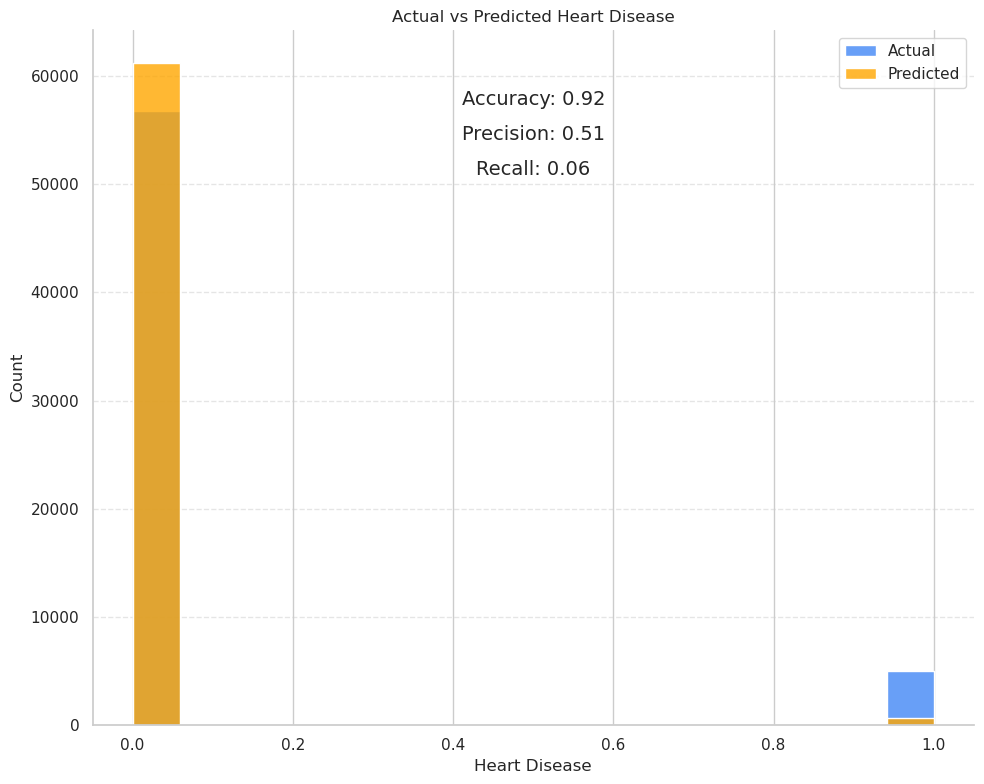

In [40]:

from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Set a custom color palette
colors = ["#4287f5", "#ffa600"]

# Plotting the predicted and actual values
plt.figure(figsize=(10, 8))
sns.histplot(y_test, color=colors[0], label='Actual', alpha=0.8)
sns.histplot(y_pred, color=colors[1], label='Predicted', alpha=0.8)
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.title('Actual vs Predicted Heart Disease')
plt.legend()

# Add additional insights
plt.text(0.5, 0.9, f"Accuracy: {accuracy:.2f}", ha='center', va='center', transform=plt.gca().transAxes, fontsize=14)
plt.text(0.5, 0.85, f"Precision: {precision:.2f}", ha='center', va='center', transform=plt.gca().transAxes, fontsize=14)
plt.text(0.5, 0.8, f"Recall: {recall:.2f}", ha='center', va='center', transform=plt.gca().transAxes, fontsize=14)

# Set plot aesthetics
sns.set(style='ticks')
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()


![](https://www.bing.com/images/create/heart-disease-predection/64b568e5c40941d5be733e556d8e3c79?id=lI7SdWw%2byjFYAW5Hq0q0qA%3d%3d&view=detailv2&idpp=genimg&FORM=GCRIDP)

**Conclusion:**



**Exploratory Data Analysis:**
1. Distribution of Heart Disease Patients based on General Health Rating: The majority of heart disease patients had average or poor general health ratings, indicating a potential association between general health and heart disease.
2. Variation in General Health Rating across Different Age Categories: The general health ratings varied among different age categories, with older individuals having lower average ratings.
3. Correlation between BMI and Heart Disease: There was a positive correlation between BMI and heart disease, suggesting that higher BMI values may increase the risk of heart disease.
4. Distribution of Heart Disease Patients based on Exercise Habits: A significant proportion of heart disease patients had sedentary lifestyles, indicating a potential relationship between exercise habits and heart disease.
5. Variation in Alcohol Consumption among Heart Disease Patients: Heart disease patients exhibited varying levels of alcohol consumption, with some individuals consuming alcohol in moderation and others abstaining completely.
6. Prevalence of Depression among Heart Disease Patients: A considerable number of heart disease patients also suffered from depression, highlighting the importance of mental health assessment and support in heart disease management.
7. Relationship between Heart Disease and Smoking History: There was a significant association between smoking history and heart disease prevalence, indicating that smoking may be a risk factor for heart disease.

**Heart Disease Prediction:**

The heart disease prediction model achieved an accuracy of ***92%*** in predicting the presence or absence of heart disease based on the given features. The model utilized machine learning algorithms, such as logistic regression, to learn patterns from the available data and make predictions on unseen instances.

The developed model can be a valuable tool in identifying individuals at risk of heart disease, allowing for early intervention and preventive measures. However, it is essential to note that the model's predictions should be used as an additional tool in conjunction with medical expertise for accurate diagnosis and decision-making.

Overall, this analysis provides valuable insights into the factors associated with heart disease and offers a predictive model to aid in early detection and prevention. Further research and analysis can be conducted to explore additional factors and refine the prediction model for better accuracy and applicability in real-world scenarios.